# 1-Goemans-Williamson

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [89]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from algorithms import max_cut
from algorithms import goemans_williamson

LEFT_COLOR = 'blue'
RIGHT_COLOR = 'green'

## 1.1 Visualization & Analysis Tools

In [58]:
def visualize_cut(graph, left, right):
    colors = []
    for vertex in graph.nodes():
        colors.append(LEFT_COLOR if vertex in left else RIGHT_COLOR)
    nx.draw(graph, node_color=colors)

In [95]:
def compare_performance(generator, algorithms, trials):
    results = [[] for algorithm in algorithms]
    for _ in range(trials):
        graph = generator()
        for index, algorithm in enumerate(algorithms):
            left, right = algorithm(graph)
            result = max_cut.evaluate_cut(graph, left, right)
            results[index].append(result)
    averages = [np.mean(result) for result in results]
    return averages

## 1.2 Max-Cut Algorithms on Various Graphs

### 1.2.1 Erdős–Rényi

In [82]:
BERNOULLI_PARAM = 0.5
GRAPH_SIZE = 20
bernoulli_graph = nx.generators.binomial_graph(GRAPH_SIZE, BERNOULLI_PARAM)

Cut size: 42


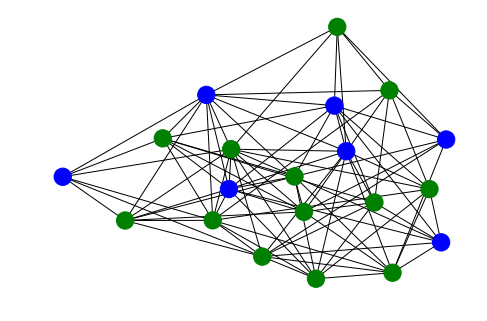

In [83]:
# Random Cut
random_left, random_right = max_cut.random_cut(bernoulli_graph, 0.5)
visualize_cut(bernoulli_graph, random_left, random_right)
random_result = max_cut.evaluate_cut(bernoulli_graph, random_left, random_right)
print('Cut size:', random_result)

Cut size: 60


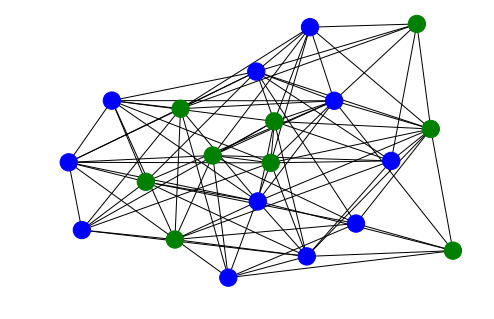

In [84]:
# Greedy Cut
greedy_left, greedy_right = max_cut.greedy_max_cut(bernoulli_graph)
visualize_cut(bernoulli_graph, greedy_left, greedy_right)
random_result = max_cut.evaluate_cut(bernoulli_graph, greedy_left, greedy_right)
print('Cut size:', random_result)

Cut size: 61


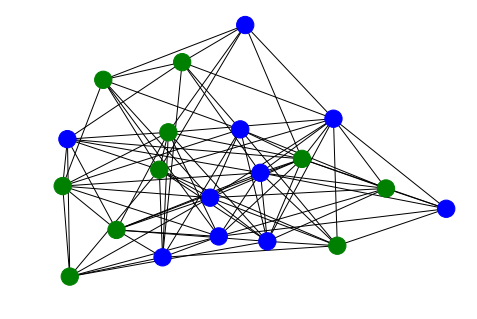

In [85]:
# Goemans Williamson Cut
sdp_left, sdp_right = goemans_williamson.goemans_williamson_weighted(bernoulli_graph)
visualize_cut(bernoulli_graph, sdp_left, sdp_right)
sdp_result = max_cut.evaluate_cut(bernoulli_graph, sdp_left, sdp_right)
print('Cut size:', sdp_result)

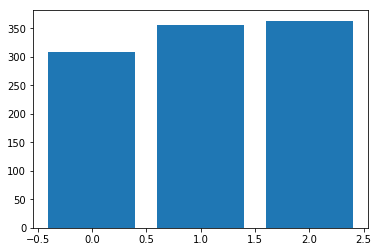

In [94]:
GRAPH_SIZE = 50
BERNOULLI_PARAM = 0.5
TRIALS = 100

generator = lambda: nx.generators.binomial_graph(GRAPH_SIZE, BERNOULLI_PARAM)
random_half = lambda graph: max_cut.random_cut(graph, 0.5)
algorithms = [random_half, max_cut.greedy_max_cut, goemans_williamson.goemans_williamson_weighted]

# Comparison of Algorithms on Erdős–Rényi Graphs
results = compare_performance(generator, algorithms, TRIALS)
bar_index = np.arange(len(results))
plt.bar(bar_index, results)
plt.show()

### 1.2.2 Stochastic Block Model